In [4]:
import cv2
import matplotlib.pyplot as plt

from deepface import DeepFace
from modules.modeling import modeling
from modules import face_recognition as fr
from commons import dir_utils

In [2]:
db_path = dir_utils.initialize_dir()

models = modeling["models"]
backends = modeling["backends"]
metrics = modeling["metrics"]

models, backends, metrics

(['VGG-Face',
  'OpenFace',
  'Facenet',
  'Facenet512',
  'DeepFace',
  'DeepID',
  'Dlib',
  'ArcFace',
  'SFace',
  'GhostFaceNet'],
 ['opencv',
  'mtcnn',
  'ssd',
  'dlib',
  'retinaface',
  'mediapipe',
  'yolov8',
  'yolov11n',
  'yolov11s',
  'yolov11m',
  'yunet',
  'fastmtcnn',
  'centerface'],
 ['cosine', 'euclidean', 'euclidean_l2'])

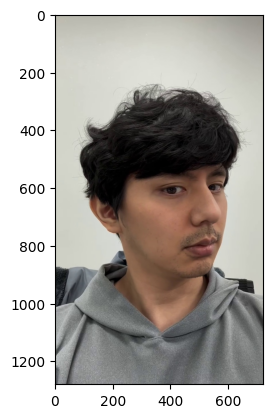

In [3]:
img_path = "./img_src/img1.jpg"
raw_img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
#plt.axis('off')
plt.savefig('./img_output/img1_input', bbox_inches='tight')

### 1. Detection

In [4]:
img = raw_img.copy()

face_objs_align_false = DeepFace.extract_faces(
    img_path=img,
    detector_backend=backends[4],
    align=False
)

face_objs = DeepFace.extract_faces(
    img_path=img,
    detector_backend=backends[4],
    align=True)

face_objs

2024-12-23 02:43:14.893294: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1734889394.893458   82992 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
I0000 00:00:1734889398.409395   83063 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-23 02:43:20.131208: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:378] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impac

[{'face': array([[[0.05882353, 0.05098039, 0.05490196],
          [0.06666667, 0.05882353, 0.0627451 ],
          [0.07843137, 0.07058824, 0.0745098 ],
          ...,
          [0.2       , 0.19215686, 0.19607843],
          [0.12941176, 0.12156863, 0.1254902 ],
          [0.09803922, 0.09019608, 0.09411765]],
  
         [[0.07058824, 0.0627451 , 0.06666667],
          [0.06666667, 0.05882353, 0.0627451 ],
          [0.0745098 , 0.06666667, 0.07058824],
          ...,
          [0.19607843, 0.18823529, 0.19215686],
          [0.1254902 , 0.11764706, 0.12156863],
          [0.10196078, 0.09411765, 0.09803922]],
  
         [[0.06666667, 0.05882353, 0.0627451 ],
          [0.0745098 , 0.06666667, 0.07058824],
          [0.0745098 , 0.06666667, 0.07058824],
          ...,
          [0.17254902, 0.16470588, 0.16862745],
          [0.10980392, 0.10196078, 0.10588235],
          [0.10588235, 0.09803922, 0.10196078]],
  
         ...,
  
         [[0.41960784, 0.31764706, 0.23529412],
      

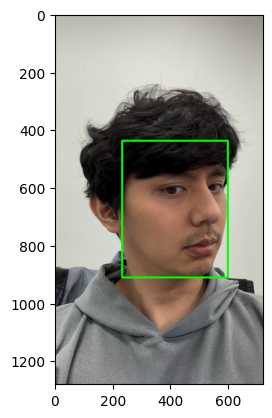

In [5]:
# grab facial areas
for face_obj in face_objs:
    facial_area = [
        (
            face_obj["facial_area"]["x"],
            face_obj["facial_area"]["y"],
            face_obj["facial_area"]["w"],
            face_obj["facial_area"]["h"],
            face_obj.get("is_real", True),
            face_obj.get("antispoof_score", 0),
        )
    ]
faces_coordinates = facial_area

# highlight facial area with rectangle
for x, y, w, h, is_real, antispoof_score in faces_coordinates:
    color = (0, 255, 0)
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig('./img_output/img1_detection', bbox_inches='tight')

### 2. Alignment

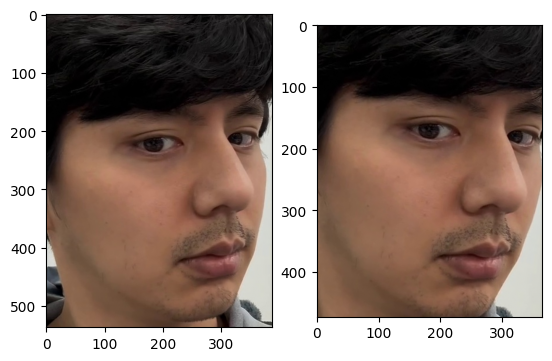

In [6]:
# alignment
for obj in face_objs_align_false:
    face_align_false = obj['face']
    plt.subplot(121), plt.imshow(face_align_false)

for obj in face_objs:
    face = obj['face']
    plt.subplot(122), plt.imshow(face)
plt.savefig('./img_output/img1_alignment', bbox_inches='tight')

### 3. Recognition

In [32]:
# grab facial areas
for face_obj in face_objs:
    facial_area = [
        (
            face_obj["facial_area"]["x"],
            face_obj["facial_area"]["y"],
            face_obj["facial_area"]["w"],
            face_obj["facial_area"]["h"],
            face_obj.get("is_real", True),
            face_obj.get("antispoof_score", 0),
        )
    ]
faces_coordinates = facial_area

# extract facial area
detected_faces = []
for x, y, w, h, is_real, antispoof_score in faces_coordinates:
    detected_face = img[int(y) : int(y + h), int(x) : int(x + w)]
    detected_faces.append(detected_face)
    
detected_faces

[array([[[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        ...,
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
  

In [33]:
#face recognition
dfs = DeepFace.find(
  img_path = detected_face, 
  db_path = db_path, 
  model_name=models[3],
  detector_backend = backends[4],
  distance_metric=metrics[0],
  align = True
)

24-12-23 02:59:31 - Searching [[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]] in 22 length datastore
24-12-23 02:59:32 - find function duration 0.36229777336120605 seconds


In [34]:
df = dfs[0]
df

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,/home/naon/Fruit-Flow-Market/AIServer/FaceDete...,34978eb1a055cb19afd8e8f4953b1ce3c0ebf473,204,444,375,466,0,0,365,472,0.3,0.111612
1,/home/naon/Fruit-Flow-Market/AIServer/FaceDete...,f5a5c7c583d5b361b41383f19a149fbfcaddc555,146,445,382,465,0,0,365,472,0.3,0.140729
2,/home/naon/Fruit-Flow-Market/AIServer/FaceDete...,b6f8dde3e300ba00fae48581b81192ec23e9320c,154,443,383,466,0,0,365,472,0.3,0.146669
3,/home/naon/Fruit-Flow-Market/AIServer/FaceDete...,3427c6de0441680b3e7c683544437486d6a4c322,184,449,384,473,0,0,365,472,0.3,0.155252
4,/home/naon/Fruit-Flow-Market/AIServer/FaceDete...,842b017938fc990c2ee4e7d984742070da6677f2,107,442,363,484,0,0,365,472,0.3,0.165469
5,/home/naon/Fruit-Flow-Market/AIServer/FaceDete...,c23744a122967a7c6fb079233702e7239aca8ce9,601,1069,1053,1400,0,0,365,472,0.3,0.233232


In [35]:
candidate = df.iloc[0]
target_path = candidate["identity"]
threshold = candidate["threshold"]
distance = candidate["distance"]

target_path

'/home/naon/Fruit-Flow-Market/AIServer/FaceDetector/member_database/1/KimJongHo4.jpg'

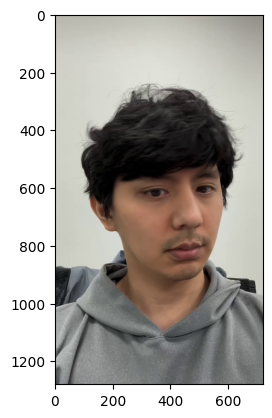

In [36]:
target_img = cv2.imread(target_path)
plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))

In [37]:
target_objs = DeepFace.extract_faces(
    img_path=target_path,
    detector_backend=backends[4],
    align=True
)

# grab facial areas
for target_obj in target_objs:
    target_facial_area = [
        (
            target_obj["facial_area"]["x"],
            target_obj["facial_area"]["y"],
            target_obj["facial_area"]["w"],
            target_obj["facial_area"]["h"],
            target_obj.get("is_real", True),
            target_obj.get("antispoof_score", 0),
        )
    ]
target_faces_coordinates = target_facial_area

target_faces_coordinates

[(204, 444, 375, 466, True, 0)]

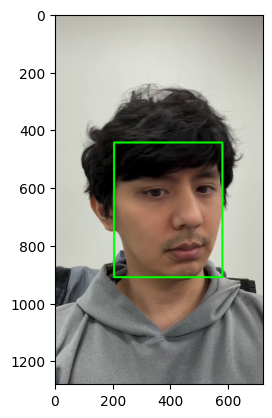

In [38]:
# highlight facial area with rectangle
for x, y, w, h, is_real, antispoof_score in target_faces_coordinates:
    color = (0, 255, 0)
    cv2.rectangle(target_img, (x, y), (x + w, y + h), color, 5)

plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
plt.savefig('./img_output/img1_recognition', bbox_inches='tight')